<a href="https://colab.research.google.com/github/Shashi2022/object-detection/blob/master/object-recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# loading the dataset
# The CIFAR10 dataset contains 60,000 color images in 10 classes, 
# with 6,000 images in each class. The dataset is divided into 50,000 training
# images and 10,000 testing images.
from tensorflow.keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()


In [18]:
#To know the shape of train dataset
X_train.shape

(50000, 32, 32, 3)

In [19]:
#To know the shape of test dataset
X_test.shape

(10000, 32, 32, 3)

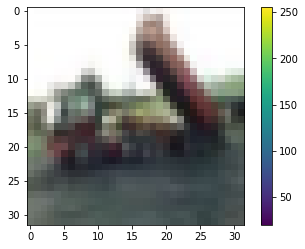

In [20]:
#plt.figure()
plt.imshow(X_train[2])
plt.colorbar()
plt.show()

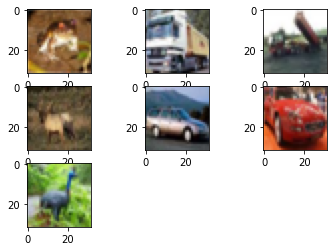

In [21]:
for i in range(7):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train[i])
plt.show()

Normalization

In [22]:
#Normalization
X_train, X_test = X_train/255.0, X_test/255.0

Building CNN

In [23]:
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 32)          18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [25]:
initial_weights = model.get_weights()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size = 32, epochs = 10, shuffle = True,validation_data=(X_test,y_test))
model.set_weights(initial_weights)

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.5505 - accuracy: 0.4306 - val_loss: 1.2731 - val_accuracy: 0.5397
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.2082 - accuracy: 0.5690 - val_loss: 1.1362 - val_accuracy: 0.5882
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0594 - accuracy: 0.6251 - val_loss: 1.0658 - val_accuracy: 0.6144
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9668 - accuracy: 0.6585 - val_loss: 0.9853 - val_accuracy: 0.6459
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8916 - accuracy: 0.6859 - val_loss: 0.9988 - val_accuracy: 0.6524
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8316 - accuracy: 0.7077 - val_loss: 0.8897 - val_accuracy: 0.6869
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7814 - accuracy: 0.7269 - val_loss: 0.8934 -

Graph : Accurecy vs Val_Accurecy

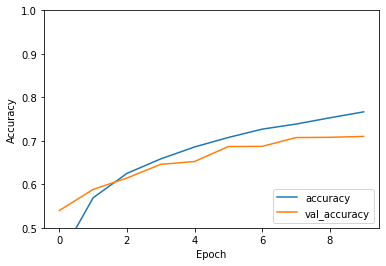

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

Data Augmentation

In [27]:
datagen = ImageDataGenerator(
            rotation_range=45,
            width_shift_range=0.15,
            height_shift_range=0.15,
            zoom_range=0.5,
            horizontal_flip=True
            )


In [28]:
datagen.fit(X_train)

In [29]:

history = model.fit(datagen.flow(X_train, y_train,
                                    batch_size=32),
                                    epochs=10,
                                    validation_data=(X_test, y_test),
                                    workers=4)

Epoch 1/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.9141 - accuracy: 0.2895 - val_loss: 1.5418 - val_accuracy: 0.4517
Epoch 2/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.6847 - accuracy: 0.3894 - val_loss: 1.4460 - val_accuracy: 0.4783
Epoch 3/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.5975 - accuracy: 0.4210 - val_loss: 1.3780 - val_accuracy: 0.5090
Epoch 4/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.5229 - accuracy: 0.4518 - val_loss: 1.3040 - val_accuracy: 0.5345
Epoch 5/10
1563/1563 [==============================] - 83s 53ms/step - loss: 1.4708 - accuracy: 0.4716 - val_loss: 1.2786 - val_accuracy: 0.5457
Epoch 6/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.4308 - accuracy: 0.4874 - val_loss: 1.2374 - val_accuracy: 0.5592
Epoch 7/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.4018 - accuracy: 0.4999 - val_loss: 1.1924 -

Plot a graph : Accurecy vs Val_Accurecy after Data Augmentation

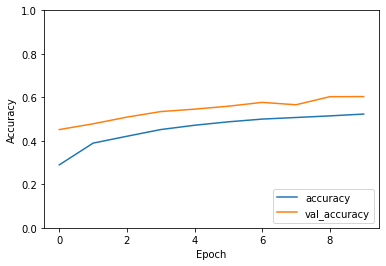

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')